In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [2]:
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.17.0


In [3]:
input_shape = (64, 64, 3)
batch_size = 64
epochs = 10
target_size = (64, 64)
class_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
training_set = train_datagen.flow_from_directory(
    'training_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4317 images belonging to 5 classes.


In [7]:
test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 165 images belonging to 5 classes.


In [8]:
def get_images_from_flow(flow, num_images):
    images, labels = next(flow)
    return images[:num_images], labels[:num_images]

In [9]:
def plot_images(images, labels, class_names, num_rows, num_cols):
    plt.figure(figsize=(12, 6))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

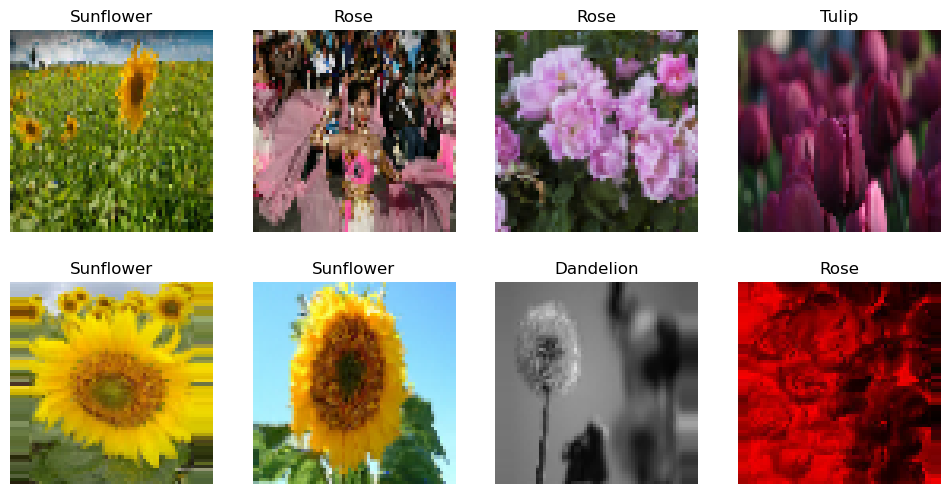

In [10]:
# Lấy 8 ảnh từ dòng dữ liệu
num_images = 8
images, labels = get_images_from_flow(training_set, num_images)

# Vẽ ảnh với 2 dòng và 4 cột
plot_images(images, labels, class_names, num_rows=2, num_cols=4)

In [11]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
cnn.add(tf.keras.layers.BatchNormalization())  # Thêm BatchNormalization
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.5))  # Thêm lớp Dropout để giảm overfitting
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

C:\Users\Phan Tuan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,645,637 (6.28 MB)

 Trainable params: 1,645,381 (6.28 MB)

 Non-trainable params: 256 (1.00 KB)

In [14]:
# Thêm EarlyStopping và ModelCheckpoint để tối ưu hóa quá trình huấn luyện
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [15]:
History = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)
print("Huấn luyện mô hình đã hoàn tất và được lưu thành công.")

Epoch 1/10


C:\Users\Phan Tuan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 953ms/step - accuracy: 0.4083 - loss: 3.5660 - val_accuracy: 0.2061 - val_loss: 3.0536
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 931ms/step - accuracy: 0.5244 - loss: 1.2286 - val_accuracy: 0.2121 - val_loss: 3.3555
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6011 - loss: 1.0875 - val_accuracy: 0.2303 - val_loss: 3.1099
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 923ms/step - accuracy: 0.6038 - loss: 1.0460 - val_accuracy: 0.2970 - val_loss: 3.1397
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 62s 885ms/step - accuracy: 0.6467 - loss: 0.9487 - val_accuracy: 0.4061 - val_loss: 1.7782
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 62s 883ms/step - accuracy: 0.6646 - loss: 0.8610 - val_accuracy: 0.5758 - val_loss: 1.1028
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 62s 883ms/step - accuracy: 0.6848 - loss: 0.8551 - val_accuracy: 0.4545 - val_loss: 1.3266
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1000ms/step - accuracy: 0.7040 - loss: 0.7808 - val_accuracy: 0.5576 

In [29]:
#Luu model
cnn.save('new_model.keras')
print("Lưu thành công")

Lưu thành công


In [30]:
# Đánh giá mô hình trên tập dữ liệu kiểm tra
loaded_model = tf.keras.models.load_model('new_model.keras')
test_loss, test_accuracy = loaded_model.evaluate(test_set)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.7796 - loss: 0.5605
Test Accuracy: 78.18%


Lưu thành công


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


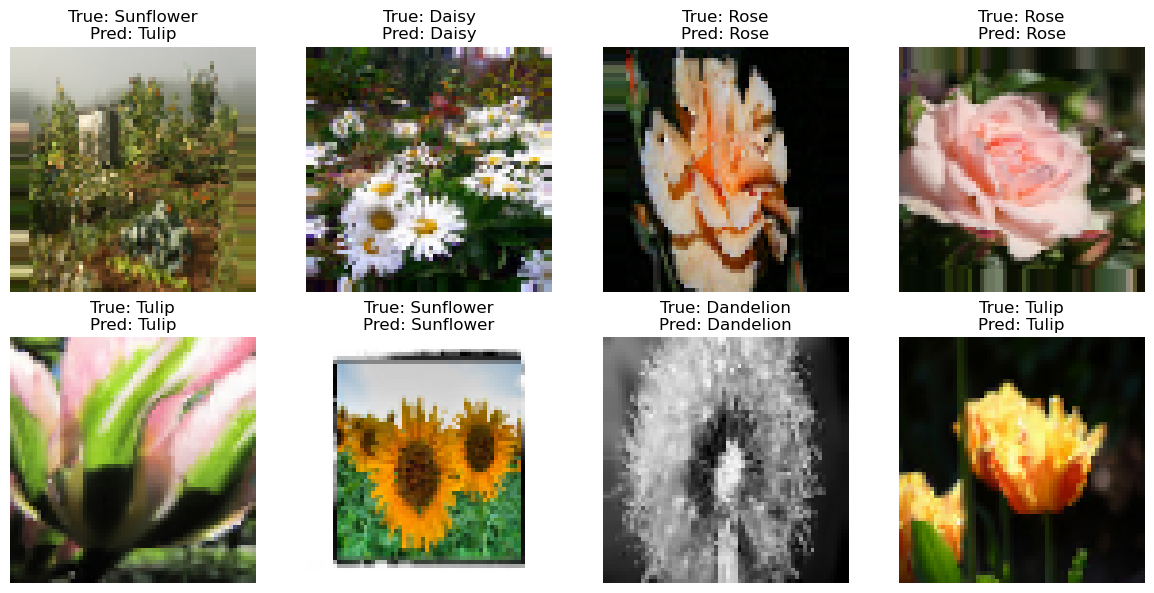

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def get_predictions_from_model(cnn, data_generator, num_images):
    """
    Lấy dự đoán từ mô hình và ảnh từ data_generator.
    
    :param cnn: Mô hình đã huấn luyện
    :param data_generator: Generator của dữ liệu (train_datagen.flow_from_directory)
    :param num_images: Số lượng ảnh cần dự đoán
    :return: tuple (images, true_classes, predicted_classes)
    """
    images, labels = next(data_generator)
    predictions = cnn.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    return images[:num_images], true_classes[:num_images], predicted_classes[:num_images]

def plot_predictions(images, true_classes, predicted_classes, class_names, num_rows, num_cols):
    """
    Hiển thị các ảnh cùng với lớp thực tế và lớp dự đoán.
    
    :param images: Danh sách các ảnh
    :param true_classes: Các lớp thực tế của các ảnh
    :param predicted_classes: Các lớp dự đoán của các ảnh
    :param class_names: Danh sách các tên lớp
    :param num_rows: Số dòng trong lưới ảnh
    :param num_cols: Số cột trong lưới ảnh
    """
    plt.figure(figsize=(12, 6))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Kiểm tra và chuẩn hóa ảnh
        img = images[i]
        if img.max() > 1:  # Nếu giá trị pixel không trong khoảng [0, 1], chuẩn hóa ảnh
            img = img / 255.0
        
        plt.imshow(img)
        true_label = class_names[true_classes[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Giả sử bạn đã huấn luyện mô hình và đã có `cnn`
num_images = 8  # Số lượng ảnh bạn muốn hiển thị
images, true_classes, predicted_classes = get_predictions_from_model(cnn, training_set, num_images)

# Vẽ ảnh với dự đoán
plot_predictions(images, true_classes, predicted_classes, class_names, num_rows=2, num_cols=4)


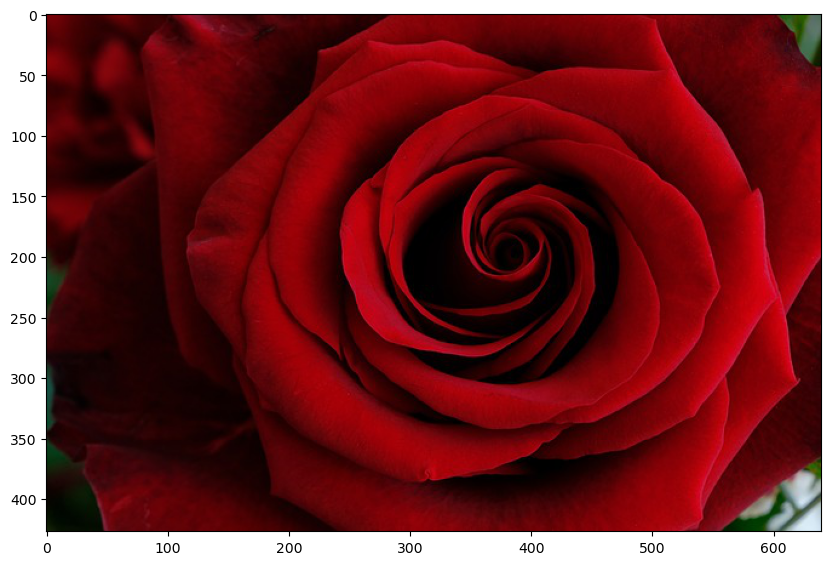

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Kết quả dự đoán: [[2.4378359e-02 1.4094244e-03 8.7482291e-01 3.7879503e-04 9.9010475e-02]]
Kết quả dự đoán: Rose


In [19]:
#test thực tế trên một ảnh bất kì của 5 loại hoa
import cv2
from PIL import Image

#list_ = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Tải hình ảnh và đảm bảo kích thước chính xác
test_image_path = 'prediction_set/rose.jpg'
test_image = Image.open(test_image_path)

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 10))
plt.imshow(test_image)

plt.show()

# Đảm bảo kích thước chính xác cho dự đoán
target_size = (64, 64)
test_image_resized = test_image.resize(target_size)

# Chuyển đổi ảnh đã thay đổi kích thước thành mảng và chuẩn hóa
test_image_array = np.array(test_image_resized)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array = test_image_array / 255.0

# Dự đoán kết quả
result = loaded_model.predict(test_image_array)
# Chuyển đổi dự đoán thành chỉ số lớp
predicted_class_index = np.argmax(result, axis=1)[0]
# Ánh xạ chỉ số lớp thành tên loại hoa
predicted_flower_name = class_names[predicted_class_index]

print("Kết quả dự đoán:", result)
print("Kết quả dự đoán:", predicted_flower_name)

In [22]:
# Lớp của kết quả dự đoán
predicted_class_index = np.argmax(result[0])
predicted_class = class_names[predicted_class_index]
print(f'Dự đoán lớp: {predicted_class}')

Dự đoán lớp: Rose


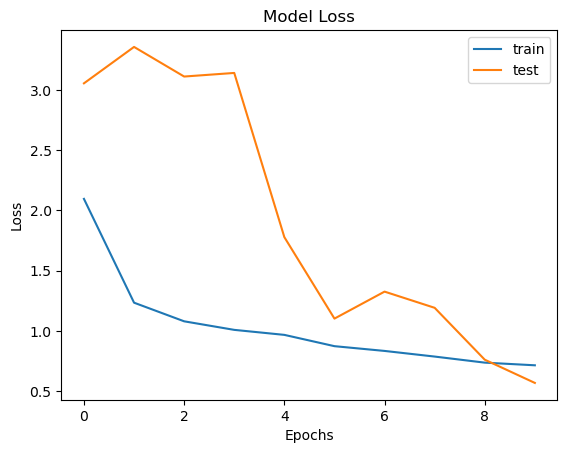

In [23]:
#Đánh giá hiệu suất
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

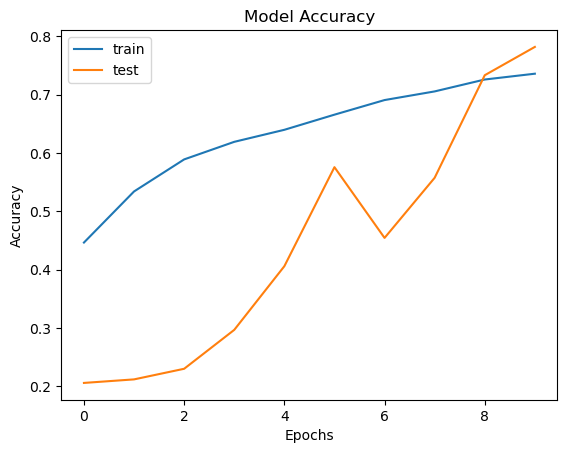

In [24]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()